# KNN | zoo_data

#### Implement a KNN model to classify the animals in to categories


### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import Data

In [3]:
zoo=pd.read_csv("Zoo.csv")

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### EDA

In [101]:
len(zoo)

101

In [41]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

#### There is no mising values

In [9]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [100]:
counts=zoo['animal name'].value_counts()
counts[counts>1]

frog    2
Name: animal name, dtype: int64

In [102]:
zoo[zoo['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


#### Split the data into target and feature variables

In [177]:
X=zoo.iloc[:,:17]
y=zoo.iloc[:,17]
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [171]:
X.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [170]:
X.shape

(101, 17)

### Graphical Analysis

#### Countplot

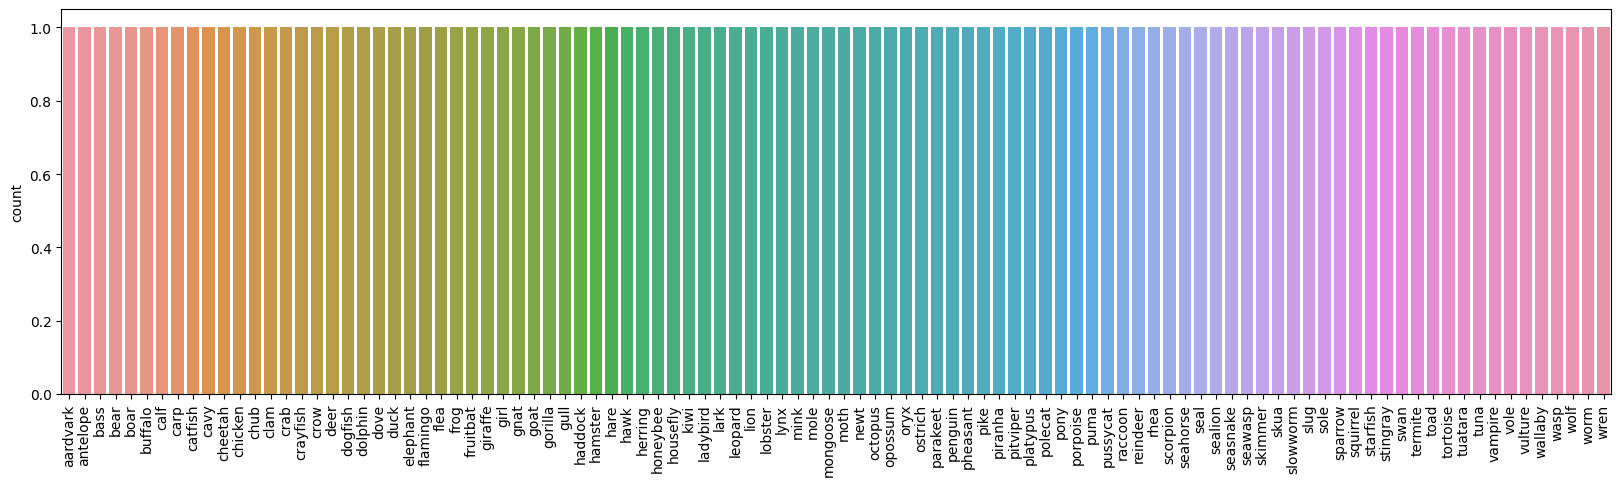

In [53]:
plt.subplots(figsize=(20,5))
sns.countplot(x=y.unique(),data=zoo)
plt.xticks(rotation='vertical')
plt.show()

frog    2
Name: animal name, dtype: int64

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


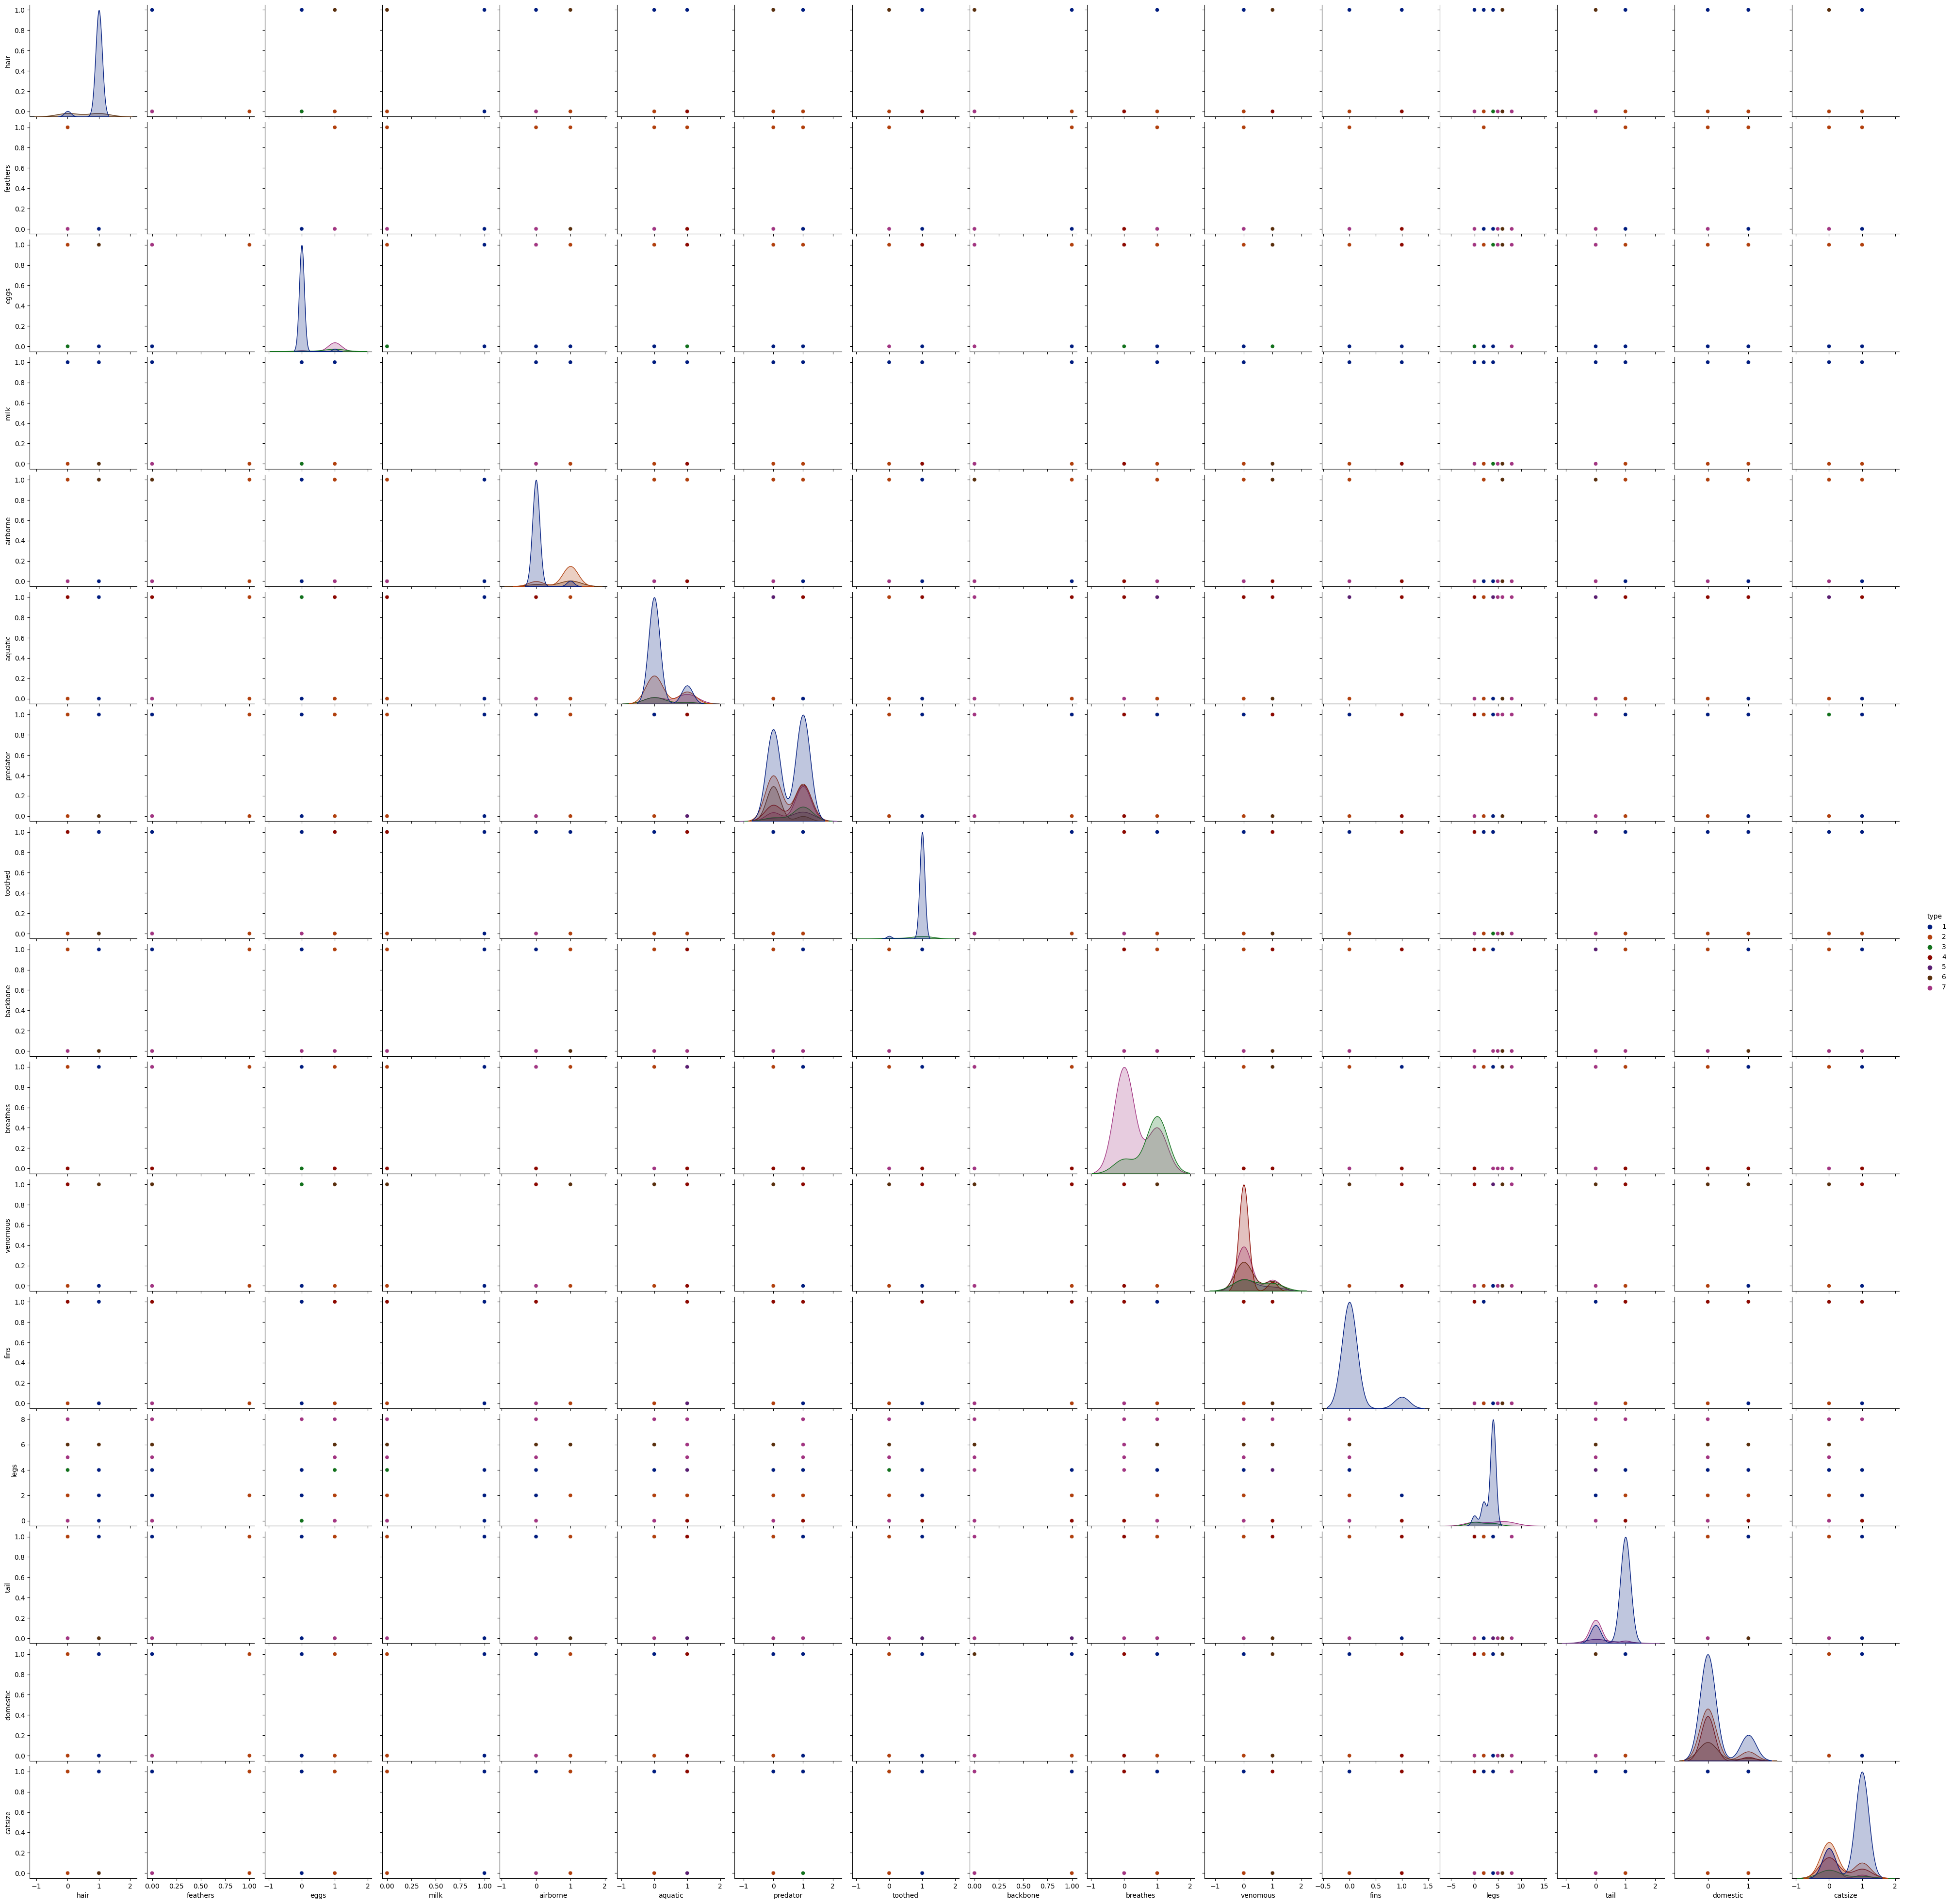

In [99]:
sns.pairplot(data=zoo,hue='type',palette='dark')

#### Histogaram of feature variables

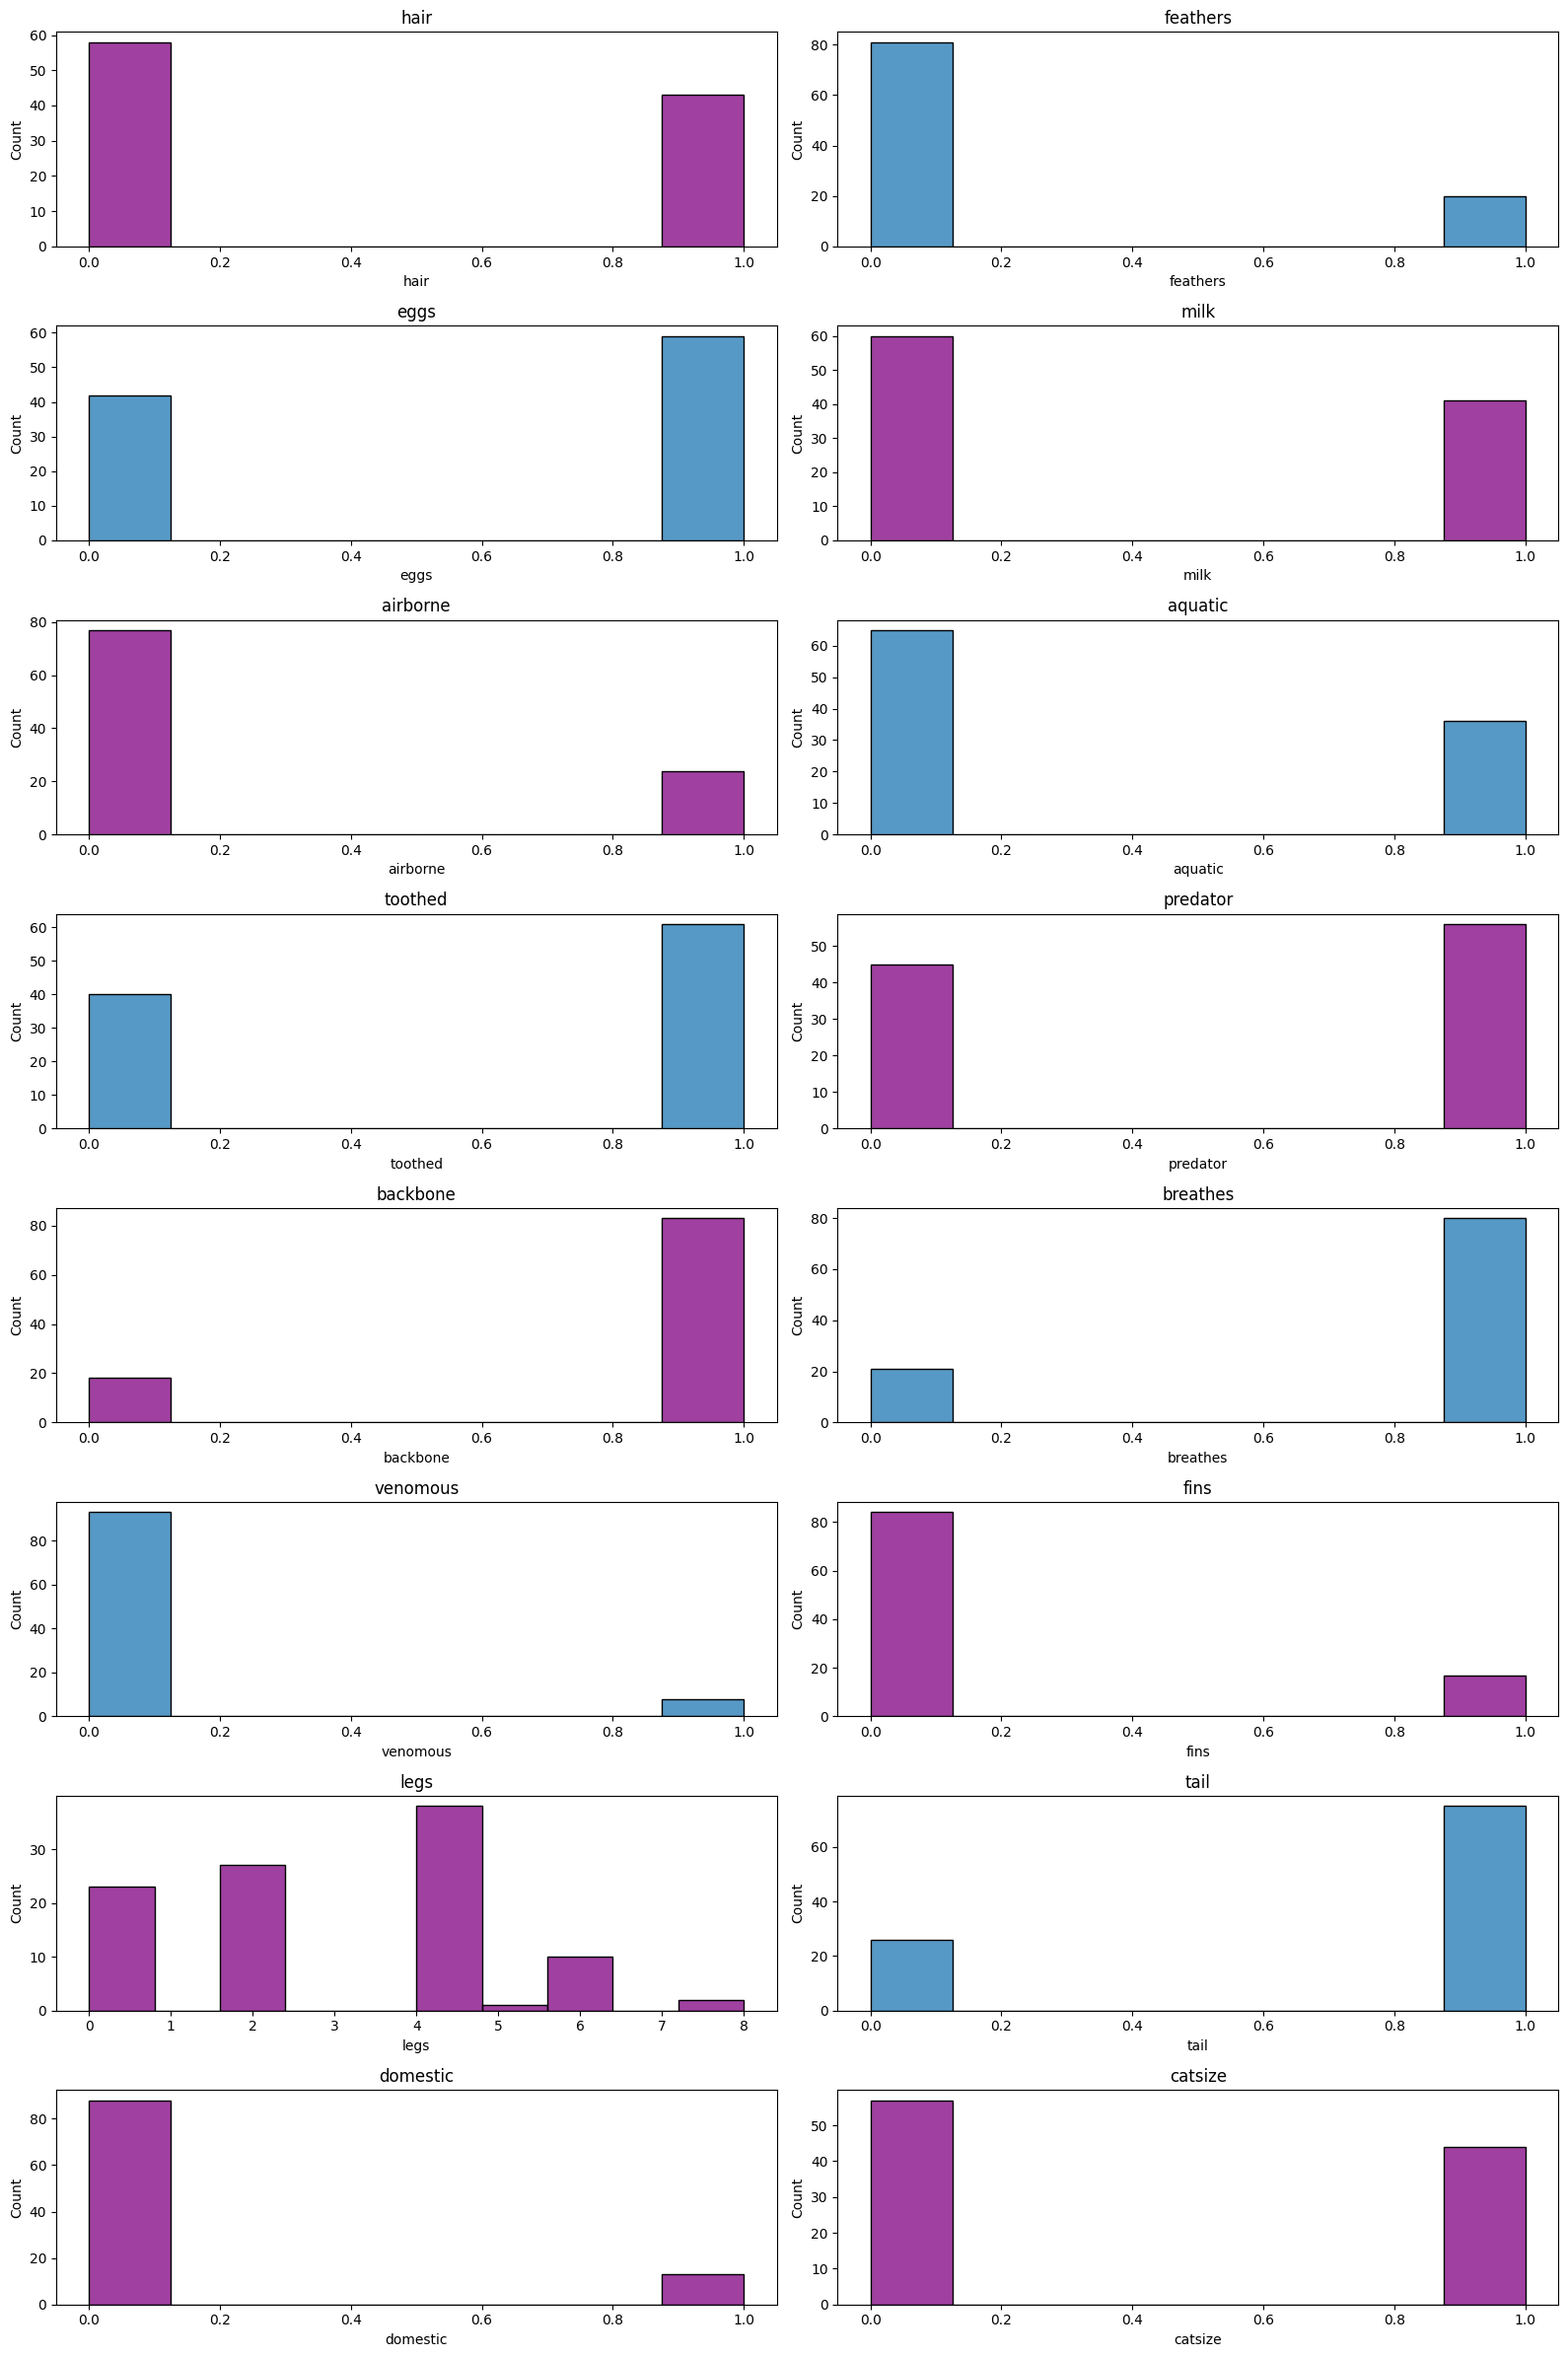

In [98]:
fig , ax = plt.subplots(figsize=(16,24),nrows=8,ncols=2)

sns.histplot(zoo.hair,ax=ax[0,0],color='purple')
ax[0,0].set_title('hair')
sns.histplot(zoo.feathers,ax=ax[0,1])
ax[0,1].set_title('feathers')
sns.histplot(zoo.eggs,ax=ax[1,0])
ax[1,0].set_title('eggs')
sns.histplot(zoo.milk,ax=ax[1,1],color='purple')
ax[1,1].set_title('milk')
sns.histplot(zoo.airborne,ax=ax[2,0],color='purple')
ax[2,0].set_title('airborne')
sns.histplot(zoo['aquatic'],ax=ax[2,1])
ax[2,1].set_title('aquatic')
sns.histplot(zoo['toothed'],ax=ax[3,0])
ax[3,0].set_title('toothed')
sns.histplot(zoo['predator'],ax=ax[3,1],color='purple')
ax[3,1].set_title('predator')
sns.histplot(zoo['backbone'],ax=ax[4,0],color='purple')
ax[4,0].set_title('backbone')
sns.histplot(zoo['breathes'],ax=ax[4,1])
ax[4,1].set_title('breathes')
sns.histplot(zoo['venomous'],ax=ax[5,0])
ax[5,0].set_title('venomous')
sns.histplot(zoo['fins'],ax=ax[5,1],color='purple')
ax[5,1].set_title('fins')
sns.histplot(zoo['legs'],ax=ax[6,0],color='purple')
ax[6,0].set_title('legs')
sns.histplot(zoo['tail'],ax=ax[6,1])
ax[6,1].set_title('tail')
sns.histplot(zoo['domestic'],ax=ax[7,0],color='purple')
ax[7,0].set_title('domestic')
sns.histplot(zoo['catsize'],ax=ax[7,1],color='purple')
ax[7,1].set_title('catsize')
plt.tight_layout()


C:\Users\rakes\AppData\Local\Temp\ipykernel_25872\1727352326.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True)


<Axes: >

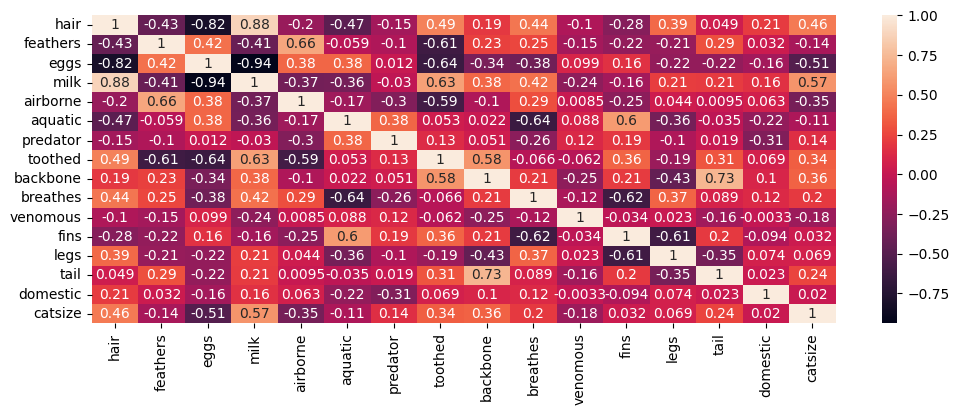

In [109]:
plt.subplots(figsize=(12,4))
sns.heatmap(X.corr(),annot=True)


#### There is no serious Multicollinearity seen among feature variables

#### Target variable distribution

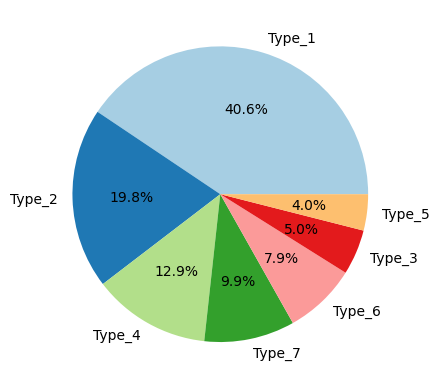

array([41, 20, 13, 10,  8,  5,  4], dtype=int64)

In [152]:
labels = value_counts.index
values = value_counts.values
labels=['Type_1', 'Type_2','Type_4', 'Type_7', 'Type_6', 'Type_3', 'Type_5']
# piechart
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.show()

<Axes: >

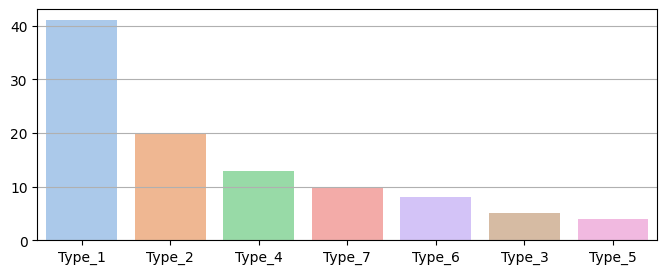

In [209]:
plt.figure(figsize=(8,3))
plt.grid()
sns.barplot(x=labels,y=values,palette='pastel')

#### Distribution is not uniform. As of now lets proceed with our existing data.

#### Data Preprocessing

In [210]:
# Since the column 'animal name ' is unique for every row , it is almost reduntant. Lets drop the column

In [ ]:
X.head()
X.drop(['animal name'],axis=1,inplace=True)
X.head()

### KNN Modelling

In [229]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)
#test_size is quite important in our case since dataset is small and contribution of minority classes are quite low

In [271]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier(n_neighbors=1)

In [272]:
kmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### Prediction and Evaluation

In [273]:
y_pred=kmodel.predict(X_test)

In [274]:
#confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  3]], dtype=int64)

In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.97        31
   macro avg       0.93      0.96      0.93        31
weighted avg       0.98      0.97      0.97        31



#### As per the classification report the model gives pretty good performance parameters
#### Lets check for optimal value of k(n_neighbors)

In [237]:
error= []

for i in range(1,50):
    
    kmodel_test = KNeighborsClassifier(n_neighbors=i)
    kmodel_test.fit(X_train,y_train)
    y_pred_i= kmodel_test.predict(X_test)
    error.append(np.mean(y_pred_i != y_test))

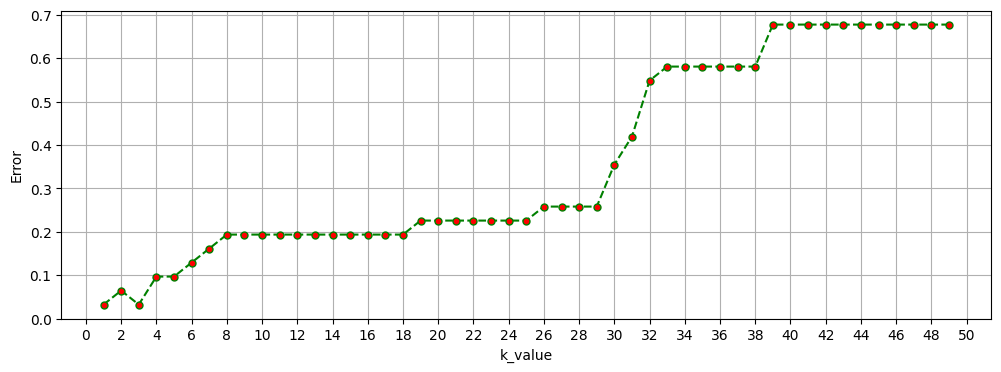

In [259]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(range(1,50),error,marker='o',linestyle='dashed',markersize=5,color='g',markerfacecolor='r')
plt.xticks(np.linspace(0,50,26))
plt.xlabel('k_value')
plt.ylabel('Error')

plt.show()

#### We can see that the error increases as k value increases. In the range of 8 to 18 we can see a constant error rate..Lets check with k=15

In [279]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
kmodel15= KNeighborsClassifier(n_neighbors=15)
kmodel15.fit(X_train,y_train)
pred_15 = kmodel15.predict(X_test)

print(confusion_matrix(y_test,pred_15))
print('\n')

[[10  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  0  0  1  0  2  0]]




In [278]:
print(classification_report(y_test,pred_15))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         1
           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1
           6       0.33      1.00      0.50         1
           7       0.00      0.00      0.00         4

    accuracy                           0.81        31
   macro avg       0.41      0.57      0.47        31
weighted avg       0.68      0.81      0.73        31



C:\Users\rakes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### The performance has reduced with k=15

### K-Fold Cross Validation

In [290]:
from sklearn.model_selection import KFold,cross_val_score

kfold_model=KNeighborsClassifier(n_neighbors=1)
kfold=KFold(n_splits=5,shuffle=True,random_state=99)

cv_scores=cross_val_score(kfold_model,X,y,cv=kfold,scoring='accuracy')
cv_scores

array([1. , 1. , 0.9, 1. , 1. ])

In [292]:
print('Average Cross Validation Accuracy = ',cv_scores.mean())

Average Cross Validation Accuracy =  0.9800000000000001


### Conclusion
#### KNN Model is developed with k=1 which gives an average CV Accuracy of .98